In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize, misc


In [4]:
pdf = lambda s,b: 2*s/(b*b) * ((b/np.sqrt(s*s - a*a)) - 1)

#### 1. 
Write a simple program that simulates this situation with 𝑏 = 4 (randomly choosing two points and
calculating the distance between them) to produce 100 independent values, 𝑠𝑖, 𝑖 = 1, … ,100. At the
top of the program, call the seeding method “np.random.seed(1234)” to ensure that you will
get the same results if you run the program at a later time.


In [5]:

np.random.seed(1234)
a = 1
b = 4
s = [] #list of s values
n = 100

for i in range (n):
#points chosen on each rod
    b1 = np.random.rand()*b #scale by length of rod
    b2 = np.random.rand()*b
    s.append(np.sqrt((b2-b1)**2 + a**2))

2. 
Show the distribution of these values in a histogram with bin width 𝑤 = 0.1, with the left edge of
the first bin at 𝑠 = 𝑎. Overlay on the histogram the probability distribution scaled appropriately (see
p. 80). Start the curve at 𝑠 = 𝑎 + 𝑤/2 , and use points separated by 𝑤/5 to define the curve.

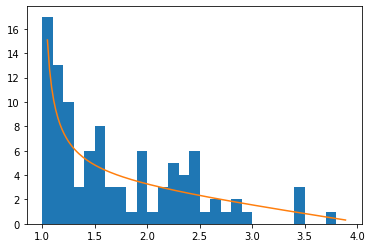

In [6]:
#histogram time
#default align=mid gives left edge of first bin at s=a
w = .1
x_max = max(s)+.2
plt.hist(s, bins=np.arange(a, x_max, w))#, align="right")

# overlay scaled PDF with finer bins to get a smooth curve
#scaling factor: pdf*numpoints*binwidth
x_points = np.arange((a+w/2), x_max, w/5)
y_points = n*w*pdf(x_points, b)
plt.plot(x_points, y_points)
plt.show()

3. 
We will use the maximum likelihood method to estimate the parameter 𝑏 using a numerical
optimizer. Write a function that calculates the negative of the log of the likelihood function. (We use
the negative LL, because the optimizer finds the minimum of a function.) The function should have
one parameter, the value of 𝑏 for which the function is calculated.

In [7]:
def negLogLikelihood(b_val):
    #statement to calculate the neg logarithm of the likelihood
    #return answer
    sum = 0
    for i in range(n):
        temp_sum = np.log(pdf(s[i], b_val))
        sum -= temp_sum
    return sum

4. On a separate plot, show the negative log likelihood function. To avoid values of 𝑏 for which the
likelihood function is zero, first calculate the minimum value of 𝑏 consistent with the dataset: 𝑏min.
(This is given by 𝑏min^2 = 𝑠max^2 − 𝑎^2. You can use np.amax(array) to find the maximum value of
an array.) Plot the function between 𝑏min + 𝑤/10 and 𝑏min + 1, using points separated by 𝑤/10 to
define the curve.

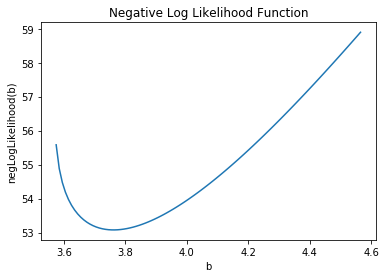

In [8]:
bmin = np.sqrt(max(s)**2 - a**2)

#plot is negloglikelihood(b_val) vs b_val
b_vals = np.arange(bmin+w/10, bmin+1, w/10)
neg_logs = negLogLikelihood(b_vals)
plt.plot(b_vals, neg_logs)
plt.title("Negative Log Likelihood Function")
plt.xlabel("b")
plt.ylabel("negLogLikelihood(b)")
plt.show()

5. Use methods provided by the scipy library to numerically find the maximum likelihood estimate, 𝑏hat
and the standard deviation of the estimator, 𝜎_𝑏. Check out the file onePar.ipynb in the Jupyter Lab
examples (under estimating parameters) to see how this is done.

In [37]:
# find the value for b that minimizes the negative log likelihood function:
result = optimize.minimize_scalar(negLogLikelihood,bounds =(bmin, bmin+1),method='bounded')
b_hat = result.x

# find the second derivative of the negative log likelihood function at the point of maximum likelihood
#decreasing values of dx give more accurate approximations of derivitive,
#from central difference formula used for derivative approx in misc.derivative().
#However note: if dx is too small, results in roundoff errors (no longer a good approx)
#NOTE FROM FUTURE SARAH: it's not roundoff errors, it's global and local truncation errors 
#produces as result of derivation method!!
#Here, .1>=dx>=1e-6 produce values of sig_b that converge to 1.47, but dx<=1e-7 produce roundoff errors.
#So, use dx=1e-6.
result2 = misc.derivative(negLogLikelihood,b_hat,dx=1e-6,n=2)
sig_b = 1./np.sqrt(result2)

print("The maximum likelihood estimate for b is {0:5.4f} +/- {1:5.4f}".format(b_hat,sig_b))

The maximum likelihood estimate for b is 3.7618 +/- 0.1468


6. As an alternative method, analytically differentiate the log likelihood function to find the equation
to calculate the second derivative. What value do you get for the standard deviation of the
estimator by this method? Is it close to the value found in Q5?

In [34]:
#use b_hat from Q5
sum_5 = 0
for i in range (n):
    sum_5 = -1/(-b + np.sqrt(s[i]**2 + a**2))**2
sig_b_analytic = 1/(n/b**2 - sum_5)
print("The standard deviation of b_hat found analytically is %.3f, which is close to the value found in Q5, as expected" %(sig_b_analytic))

The standard deviation of b_hat found analytically is 0.156, which is close to the value found in Q5, as expected


7. Repeat 1000 experiments (each with 100 values 𝑠𝑖) and plot the distribution of 𝑏_hat (see Q5). Compare
the standard deviation of that distribution with the values for 𝜎_bhat found in Q5 and Q6. Is the
maximum likelihood estimator biased?

In [ ]:
for i in range(1000):
    